In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-81.26394147620937 72.23599017147993
71.29692065190835 -64.08046925797942
80.40997388959485 1.500274228317977
-72.82275682469752 115.19247556408425
11.034166111618703 -178.32642387631884
-72.96155542597857 136.9430167196321
-49.84149178978296 -27.590169720788793
-14.243060576273663 -129.89844016533374
-44.47623755400169 172.44011145742513
26.581060376525755 93.99203542967831
55.04896660839046 -72.2386001775195
-59.83821087383906 -2.9122400348238386
1.3583571596223152 154.65572934188629
15.18292915173609 -64.37050081465874
19.468466417088337 96.73189833975727
-23.360868034254437 89.63820444067233
55.18582533470533 81.82860017146697
51.775225276276046 -126.56426130499649
-72.96907326950068 -0.8949136992851265
63.522771072192285 69.59379580939239
-53.937975178473344 63.828978876252194
-74.20192416777898 -162.43782349607284
35.30651942994544 -49.513561780527
-86.32425808303464 112.9479388201674
-30.104601632386427 131.62221100114857
-82.80765646151595 168.95994774654963
44.81782602264667 -

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 1 | clyde river
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | southbridge
Processing Record 10 of Set 1 | golaghat
Processing Record 11 of Set 1 | chapais
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | namatanai
Processing Record 14 of Set 1 | charlestown
Processing Record 15 of Set 1 | loikaw
Processing Record 16 of Set 1 | bengkulu
Processing Record 17 of Set 1 | chik
Processing Record 18 of Set 1 | port hardy
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | gornopravdinsk
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Se

Processing Record 37 of Set 4 | mlonggo
Processing Record 38 of Set 4 | faanui
Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | nanortalik
Processing Record 41 of Set 4 | mayo
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | santona
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | bulaevo
Processing Record 46 of Set 4 | ust-koksa
Processing Record 47 of Set 4 | houston
Processing Record 48 of Set 4 | nemuro
Processing Record 49 of Set 4 | saint-joseph
Processing Record 50 of Set 4 | khandyga
Processing Record 1 of Set 5 | beatrice
Processing Record 2 of Set 5 | norsup
Processing Record 3 of Set 5 | yellowknife
Processing Record 4 of Set 5 | najran
Processing Record 5 of Set 5 | kazerun
Processing Record 6 of Set 5 | vargem grande do sul
Processing Record 7 of Set 5 | bayan
Processing Record 8 of Set 5 | itoman
Processing Record 9 of Set 5 | kalachinsk
Processing Record 10 of Set 5 | pres

Processing Record 25 of Set 8 | anadyr
Processing Record 26 of Set 8 | bakchar
Processing Record 27 of Set 8 | esperance
Processing Record 28 of Set 8 | saint-agapit
Processing Record 29 of Set 8 | majene
Processing Record 30 of Set 8 | weinsberg
Processing Record 31 of Set 8 | naftah
City not found. Skipping...
Processing Record 32 of Set 8 | pacific grove
Processing Record 33 of Set 8 | bilibino
Processing Record 34 of Set 8 | xuanwu
Processing Record 35 of Set 8 | soe
Processing Record 36 of Set 8 | spornoye
Processing Record 37 of Set 8 | labutta
City not found. Skipping...
Processing Record 38 of Set 8 | lubyany
Processing Record 39 of Set 8 | celestun
Processing Record 40 of Set 8 | novyy yegorlyk
Processing Record 41 of Set 8 | kulhudhuffushi
Processing Record 42 of Set 8 | sao francisco
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | mattru
Processing Record 45 of Set 8 | colotenango
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 

Processing Record 15 of Set 12 | san andres
Processing Record 16 of Set 12 | konibodom
Processing Record 17 of Set 12 | zhangjiakou
Processing Record 18 of Set 12 | peace river
Processing Record 19 of Set 12 | ilulissat
Processing Record 20 of Set 12 | auburn
Processing Record 21 of Set 12 | nolinsk
Processing Record 22 of Set 12 | kolpny
Processing Record 23 of Set 12 | jaisalmer
Processing Record 24 of Set 12 | lucapa
Processing Record 25 of Set 12 | korla
Processing Record 26 of Set 12 | huaraz
Processing Record 27 of Set 12 | temaraia
City not found. Skipping...
Processing Record 28 of Set 12 | sioux lookout
Processing Record 29 of Set 12 | kandrian
Processing Record 30 of Set 12 | manta
Processing Record 31 of Set 12 | ituni
City not found. Skipping...
Processing Record 32 of Set 12 | alta floresta
Processing Record 33 of Set 12 | haifa
Processing Record 34 of Set 12 | ouadda
Processing Record 35 of Set 12 | severo-yeniseyskiy
Processing Record 36 of Set 12 | north las vegas
Proce

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Clyde River,70.4692,-68.5914,-3.77,77,100,10.36,CA,2022-12-28 16:41:46
1,Albany,42.6001,-73.9662,37.17,68,100,4.14,US,2022-12-28 16:40:43
2,Kapaa,22.0752,-159.3190,75.52,92,75,8.05,US,2022-12-28 16:43:36
3,Hobart,-42.8794,147.3294,50.05,69,100,5.75,AU,2022-12-28 16:43:37
4,Cidreira,-30.1811,-50.2056,68.13,79,99,11.52,BR,2022-12-28 16:43:37
5,Atuona,-9.8000,-139.0333,77.86,72,20,13.20,PF,2022-12-28 16:43:38
6,Southbridge,42.0751,-72.0334,38.08,71,97,5.01,US,2022-12-28 16:43:38
7,Golaghat,26.5167,93.9667,56.64,79,2,0.29,IN,2022-12-28 16:43:39
8,Chapais,49.7834,-74.8492,10.18,89,100,2.48,CA,2022-12-28 16:43:39
9,Cape Town,-33.9258,18.4232,74.37,57,20,17.27,ZA,2022-12-28 16:40:49


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-12-28 16:41:46,70.4692,-68.5914,-3.77,77,100,10.36
1,Albany,US,2022-12-28 16:40:43,42.6001,-73.9662,37.17,68,100,4.14
2,Kapaa,US,2022-12-28 16:43:36,22.0752,-159.3190,75.52,92,75,8.05
3,Hobart,AU,2022-12-28 16:43:37,-42.8794,147.3294,50.05,69,100,5.75
4,Cidreira,BR,2022-12-28 16:43:37,-30.1811,-50.2056,68.13,79,99,11.52
...,...,...,...,...,...,...,...,...,...
555,Channel-Port Aux Basques,CA,2022-12-28 17:09:35,47.5702,-59.1367,26.15,61,100,18.10
556,Saint Anthony,US,2022-12-28 17:10:28,45.0205,-93.2180,36.91,76,0,13.80
557,Bubaque,GW,2022-12-28 17:10:29,11.2833,-15.8333,77.05,65,94,11.72
558,San Miguel,SV,2022-12-28 17:10:29,13.4833,-88.1833,87.49,40,68,3.62


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

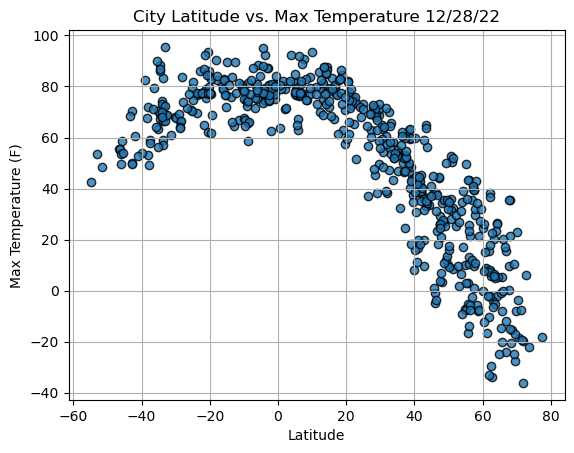

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

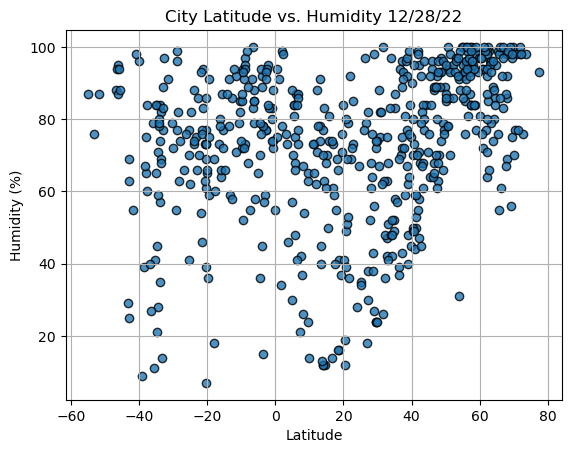

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

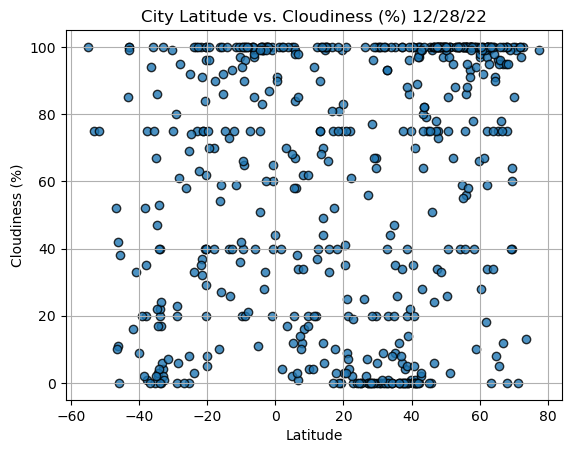

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


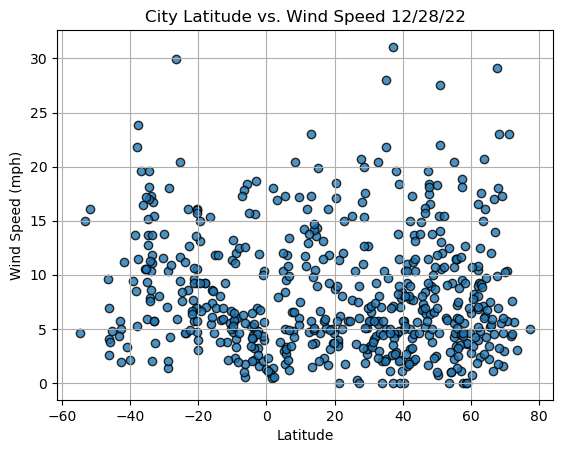

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Bengkulu
Country                        ID
Date          2022-12-28 16:43:41
Lat                       -3.8004
Lng                      102.2655
Max Temp                    74.46
Humidity                       89
Cloudiness                    100
Wind Speed                   4.43
Name: 13, dtype: object

In [19]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
555     True
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Clyde River,CA,2022-12-28 16:41:46,70.4692,-68.5914,-3.77,77,100,10.36
1,Albany,US,2022-12-28 16:40:43,42.6001,-73.9662,37.17,68,100,4.14
2,Kapaa,US,2022-12-28 16:43:36,22.0752,-159.3190,75.52,92,75,8.05
6,Southbridge,US,2022-12-28 16:43:38,42.0751,-72.0334,38.08,71,97,5.01
7,Golaghat,IN,2022-12-28 16:43:39,26.5167,93.9667,56.64,79,2,0.29


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

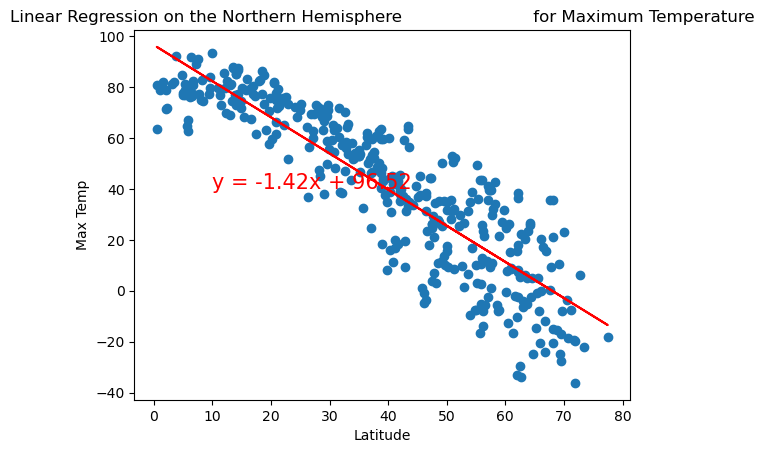

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

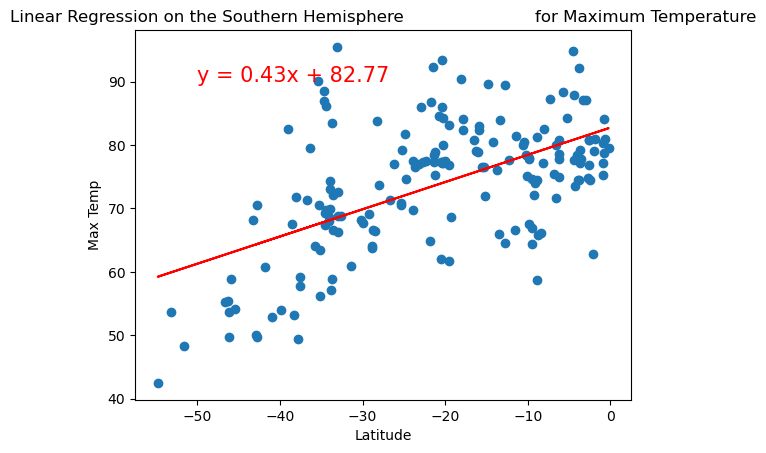

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

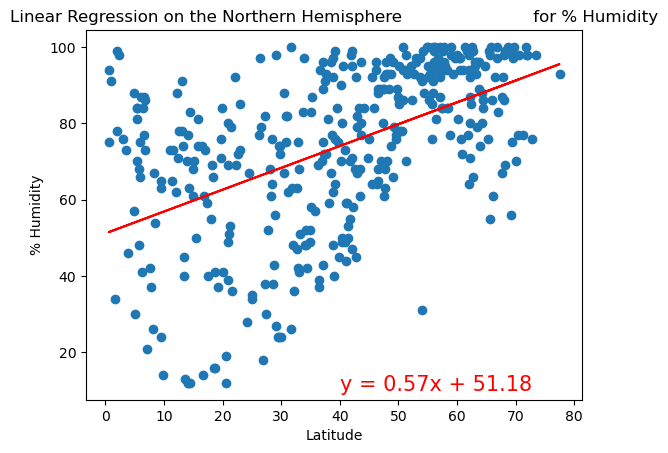

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

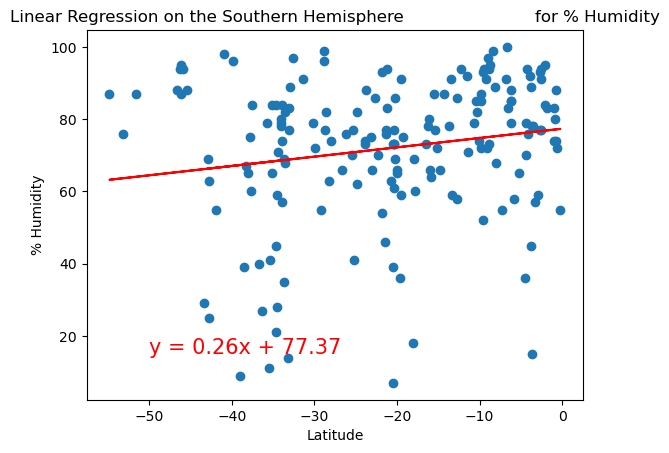

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

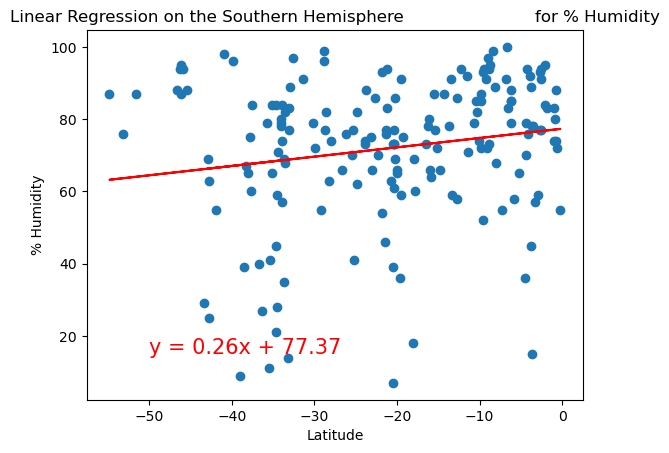

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

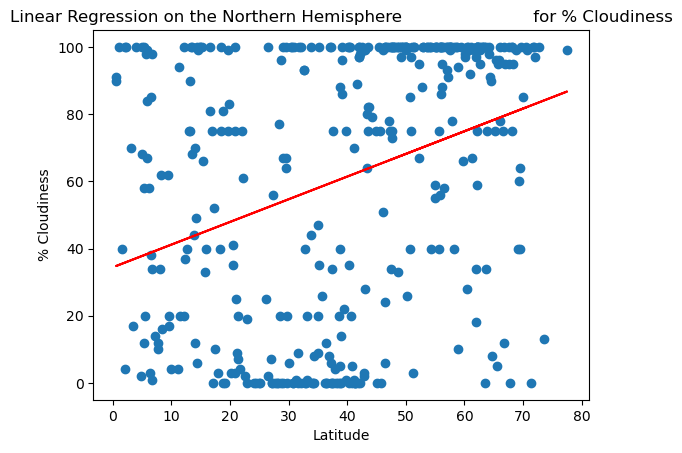

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

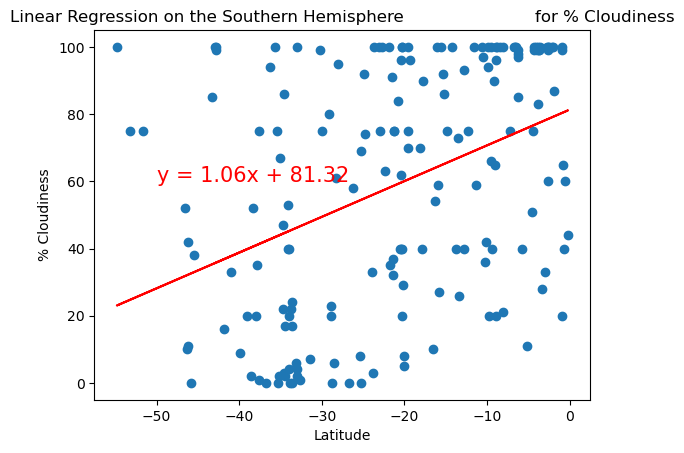

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))